## Bivariate OLS Regression

This exercise will review the OLS model assumptions and also how to interpret regression results.

In [1]:
import numpy as np
import pandas as pd
import Haver
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
Haver.path()

'R:\\\\'

In [3]:
Haver.path('C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\')

In [4]:
df=Haver.data(["ypdhm","ch"] ,'us1plus', dates=True)

In [5]:
df.head()

,ypdhm,ch
1947-03-31,NaN,1275.0
1947-06-30,NaN,1296.2
1947-09-30,NaN,1300.4
1947-12-31,NaN,1300.8
1948-03-31,NaN,1307.3


In [6]:
df.dropna()

,ypdhm,ch
1959-03-31,2195.800000,1923.7
1959-06-30,2231.233333,1953.4
1959-09-30,2228.200000,1973.8
1959-12-31,2244.033333,1976.0
1960-03-31,2269.966667,1994.9
1960-06-30,2284.633333,2020.1
1960-09-30,2289.000000,2012.0
1960-12-31,2288.033333,2014.6
1961-03-31,2309.633333,2013.9
1961-06-30,2344.733333,2043.8


In [10]:
df['logy'] = np.log(df['ypdhm'])
df['logc'] = np.log(df['ch'])
df.dropna(inplace=True)

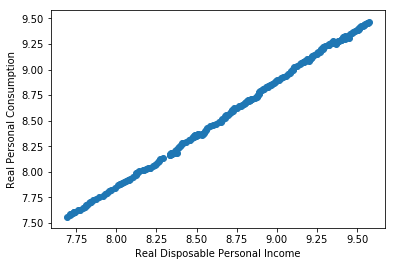

In [11]:
plt.scatter(df['logy'], df['logc'])
plt.xlabel('Real Disposable Personal Income')
plt.ylabel('Real Personal Consumption')
plt.show()

In [12]:
df

,ypdhm,ch,logy,logc
1959-03-31,2195.800000,1923.7,7.694302,7.562006
1959-06-30,2231.233333,1953.4,7.710310,7.577327
1959-09-30,2228.200000,1973.8,7.708949,7.587716
1959-12-31,2244.033333,1976.0,7.716030,7.588830
1960-03-31,2269.966667,1994.9,7.727520,7.598349
1960-06-30,2284.633333,2020.1,7.733961,7.610902
1960-09-30,2289.000000,2012.0,7.735870,7.606885
1960-12-31,2288.033333,2014.6,7.735448,7.608176
1961-03-31,2309.633333,2013.9,7.744844,7.607828
1961-06-30,2344.733333,2043.8,7.759927,7.622566


In [14]:
result = sm.ols(formula="df['logc']~ df['logy']", data=df).fit()


In [15]:
print(result.params)

Intercept    -0.435073
df['logy']    1.035372
dtype: float64


In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             df['logc']   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.390e+05
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        10:11:11   Log-Likelihood:                 626.45
No. Observations:                 239   AIC:                            -1249.
Df Residuals:                     237   BIC:                            -1242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4351      0.019    -23.458      0.0

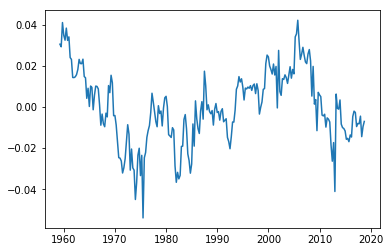

In [17]:
resid=result.resid
plt.plot(resid)